In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv(r"D:\DS data\diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [7]:
# create classifier
lr=LogisticRegression()
svc=LinearSVC(C=1.0)
rfc=RandomForestClassifier(n_estimators=100)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train,test=train_test_split(data,test_size=0.2)

In [12]:
train.shape

(614, 9)

In [16]:
test.shape

(154, 9)

In [17]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
150,1,136,74,50,204,37.4,0.399,24,0
77,5,95,72,33,0,37.7,0.370,27,0
53,8,176,90,34,300,33.7,0.467,58,1
709,2,93,64,32,160,38.0,0.674,23,1
400,4,95,64,0,0,32.0,0.161,31,1


In [18]:
train.iloc[:,:8].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
150,1,136,74,50,204,37.4,0.399,24
77,5,95,72,33,0,37.7,0.370,27
53,8,176,90,34,300,33.7,0.467,58
709,2,93,64,32,160,38.0,0.674,23
400,4,95,64,0,0,32.0,0.161,31


In [19]:
train_feat=train.iloc[:,:8]
train_targ=train["Outcome"]

In [20]:
test_feat=test.iloc[:,:8]
test_targ=test["Outcome"]

In [21]:
train_targ

150    0
77     0
53     1
709    1
400    1
      ..
627    0
25     1
85     0
257    0
494    0
Name: Outcome, Length: 614, dtype: int64

In [22]:
train_feat.shape

(614, 8)

In [23]:
test_feat.shape

(154, 8)

In [24]:
type(train_targ)

pandas.core.series.Series

In [25]:
lr.fit(train_feat,train_targ)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.score(train_feat,train_targ)

0.7703583061889251

In [27]:
lr.coef_

array([[ 0.1150175 ,  0.02714961, -0.01590514,  0.00072666, -0.00044382,
         0.05162513,  0.38760725,  0.00804189]])

In [28]:
np.transpose(lr.coef_)

array([[ 0.1150175 ],
       [ 0.02714961],
       [-0.01590514],
       [ 0.00072666],
       [-0.00044382],
       [ 0.05162513],
       [ 0.38760725],
       [ 0.00804189]])

In [30]:
lr.predict(test_feat)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [31]:
lr.score(test_feat,test_targ)

0.7857142857142857

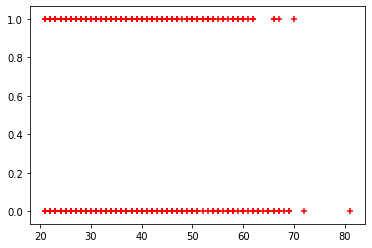

In [32]:
plt.scatter(data.Age,data.Outcome,marker="+",color="red")

# Random Forest

In [34]:
rfc.fit(train_feat,train_targ)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rfc.score(train_feat,train_targ)

1.0

In [37]:
rfc.score(test_feat,test_targ)

0.7987012987012987

In [38]:
rfc.predict(train_feat)[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(rfc.predict(train_feat),train_targ)

array([[394,   0],
       [  0, 220]], dtype=int64)

# Linear SVM Model

In [41]:
svc.fit(train_feat,train_targ)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [42]:
svc.score(train_feat,train_targ)

0.6921824104234527

In [44]:
svc.score(test_feat,test_targ)

0.7142857142857143

In [49]:
confusion_matrix(svc.predict(train_feat),train_targ)

array([[379, 174],
       [ 15,  46]], dtype=int64)

In [50]:
confusion_matrix(svc.predict(test_feat),test_targ)

array([[102,  40],
       [  4,   8]], dtype=int64)